# Dataset open access link:

(I have chosen the dataset about red wine)

https://archive.ics.uci.edu/dataset/186/wine+quality

# Student number: 220656407

# Libraries and Dataset import (Regression task)

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [61]:
import pandas as pd

file_path = "winequality-red.csv"

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, sep=';')

# Analysis and Visualization

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

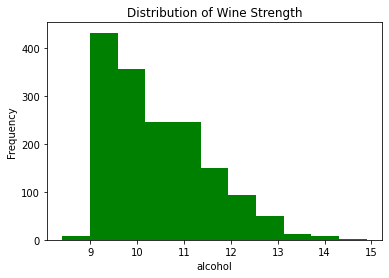

In [62]:
print(df.head())
print('')
print('-----------------------------------------------------------------------------')
print('')
print(df.info())
print('')
print('-----------------------------------------------------------------------------')
print('')
print(df.describe())
print('')
print('-----------------------------------------------------------------------------')
print('')
print(df.isnull().sum())
print('')
print('-----------------------------------------------------------------------------')
print('')


df['alcohol'].hist(bins=11, grid=False, color = 'green')
plt.xlabel('alcohol')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Strength')
plt.show()

# Unsupervised learning: PCA, StandardScaler
# Data preprocessing

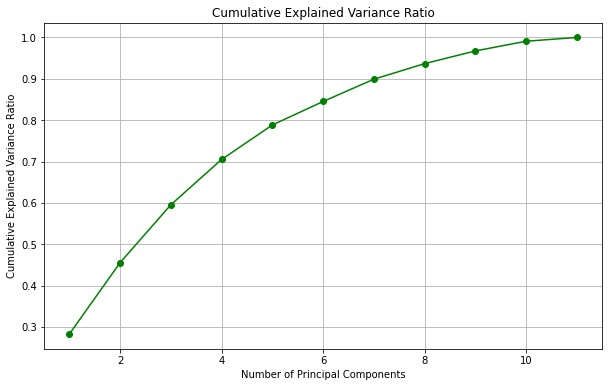

In [63]:
data = df
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('alcohol', axis = 1))
pca = PCA()
data_pca = pca.fit_transform(data_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color = 'green')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [64]:
# Extracting features and target variable
X = data.drop(columns=['alcohol'])  #'quality' is the target column
y = data['alcohol']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

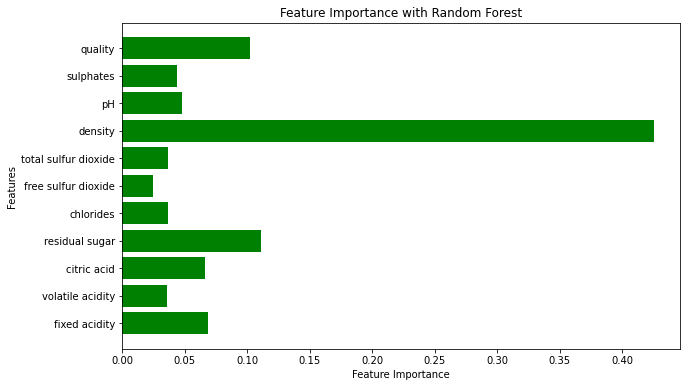

In [65]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(range(len(feature_importances)), feature_importances, align='center', color = 'green')
plt.yticks(range(len(feature_importances)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance with Random Forest')
plt.show()

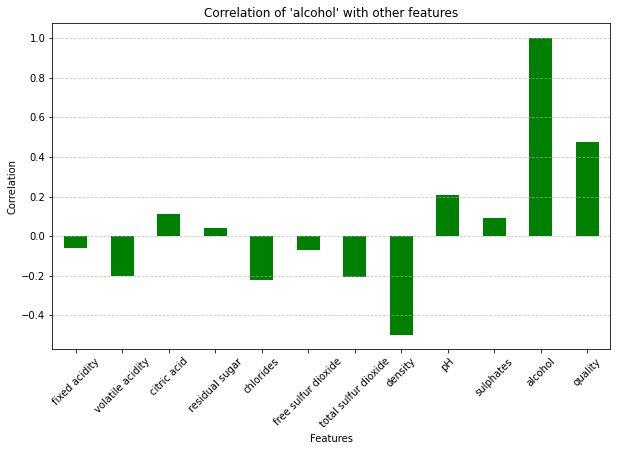

In [66]:
alcohol_corr = df.corrwith(df['alcohol'])

# it is the correlation matrix between 'alcohol' and all other features
plt.figure(figsize=(10, 6))
alcohol_corr.plot(kind='bar', color='green')
plt.title("Correlation of 'alcohol' with other features")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [67]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


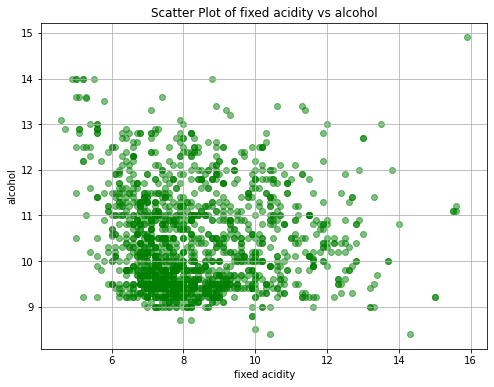

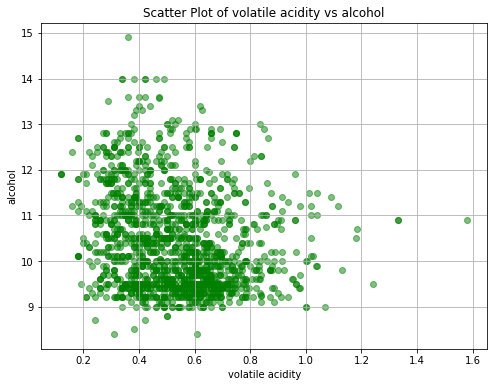

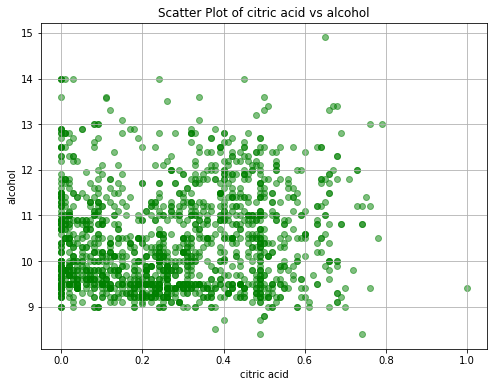

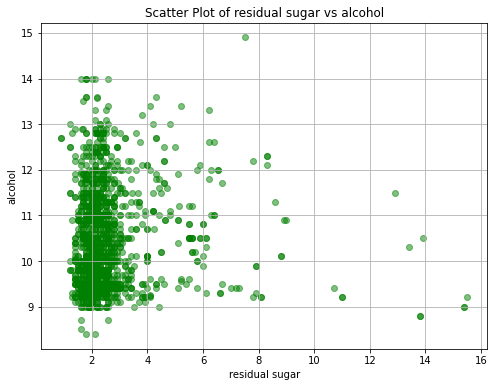

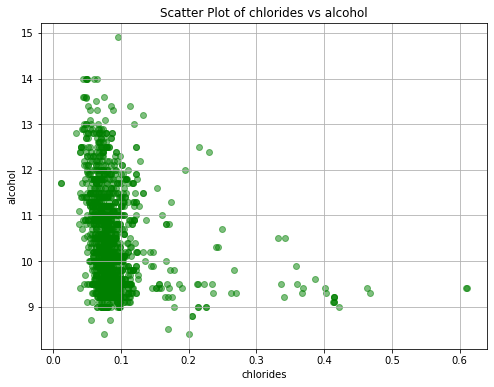

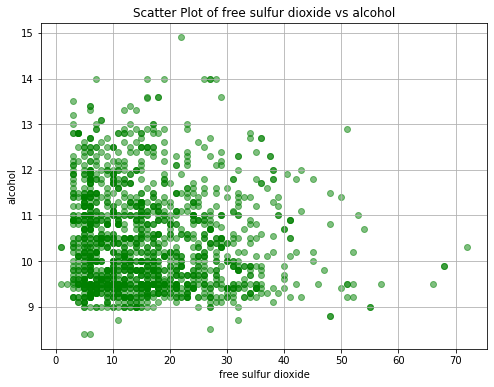

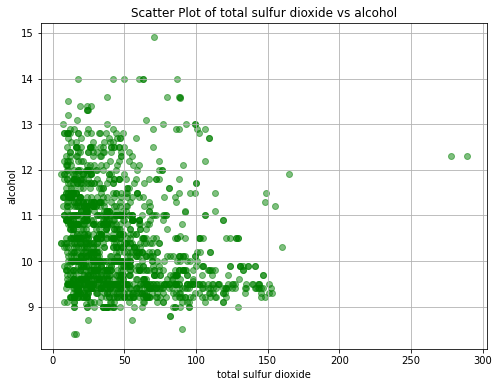

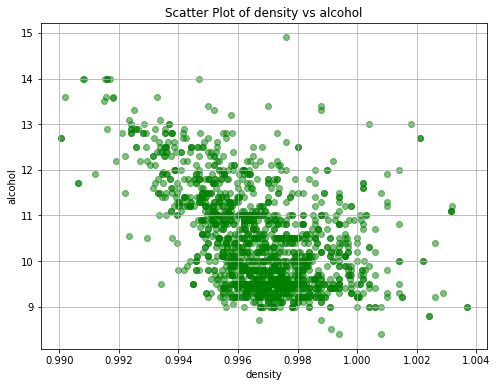

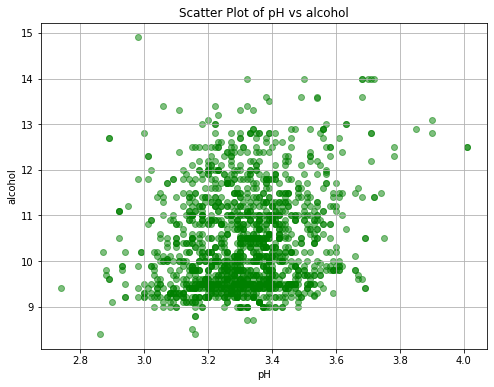

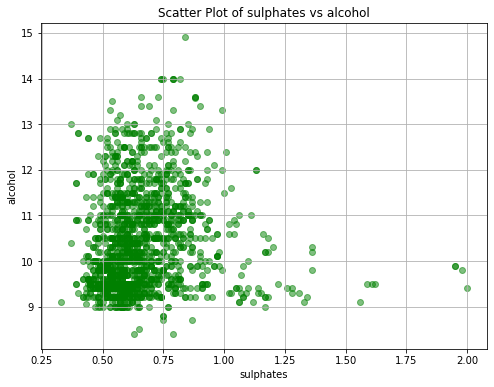

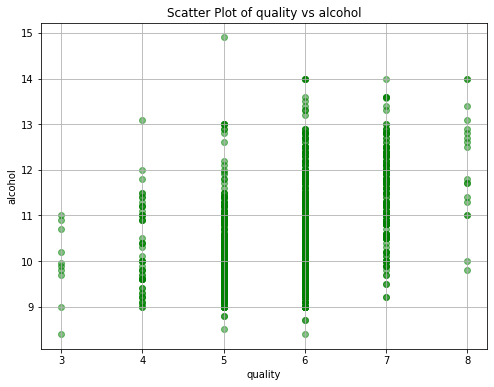

In [68]:
variables = data.columns[data.columns != 'alcohol']

for variable in variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[variable], data['alcohol'], alpha=0.5, color = 'green')
    plt.title(f'Scatter Plot of {variable} vs alcohol')
    plt.xlabel(variable)
    plt.ylabel('alcohol')
    plt.grid(True)
    plt.show()


In [69]:
# Defining a function to filter outliers using IQR
def filter_outliers_iqr(df, threshold=1.5):
    Q1 = df.quantile(0.2)
    Q3 = df.quantile(0.8)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]

# Filtering outliers using IQR
data_filtered = filter_outliers_iqr(data)

# Displaying the filtered dataset
print(data_filtered.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

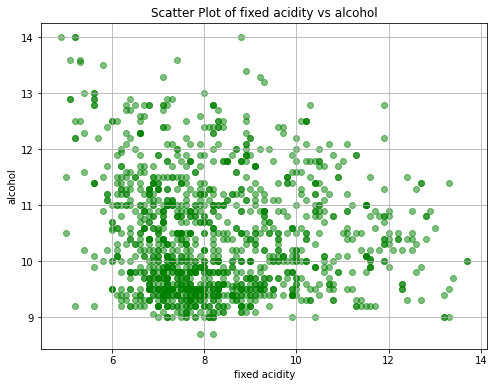

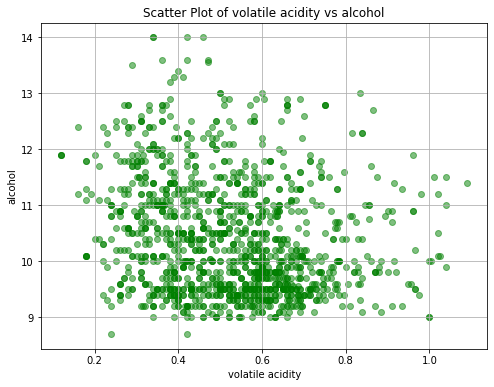

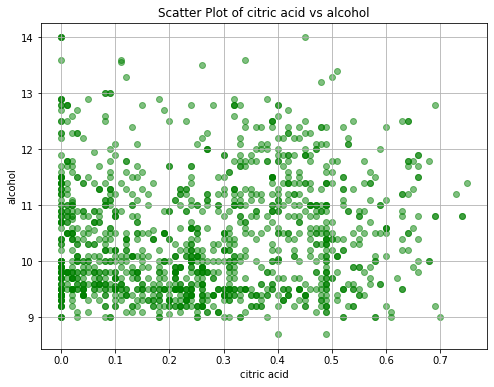

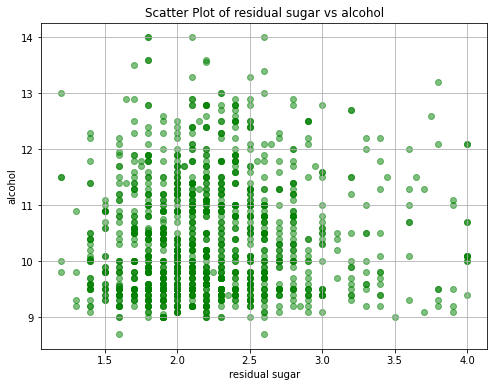

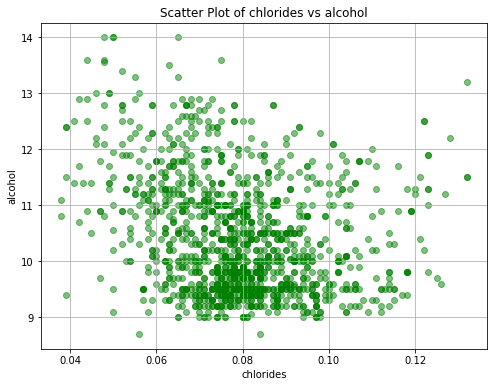

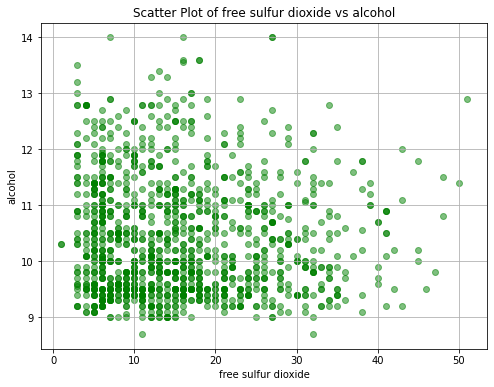

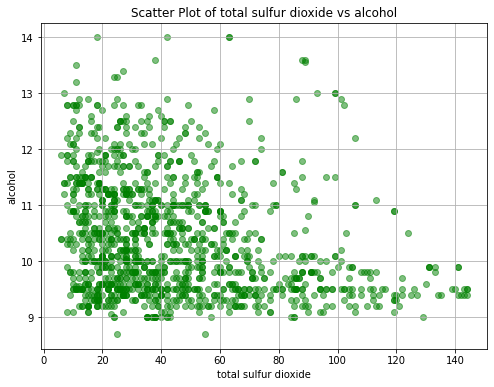

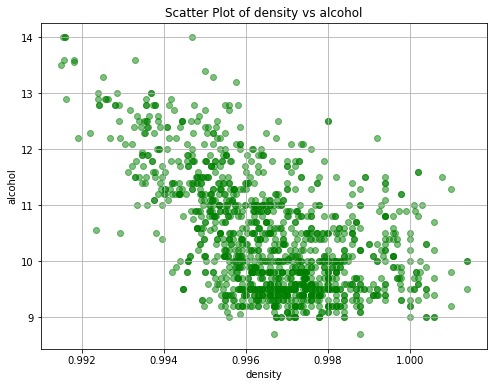

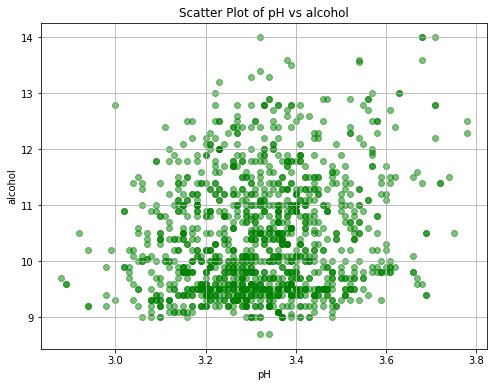

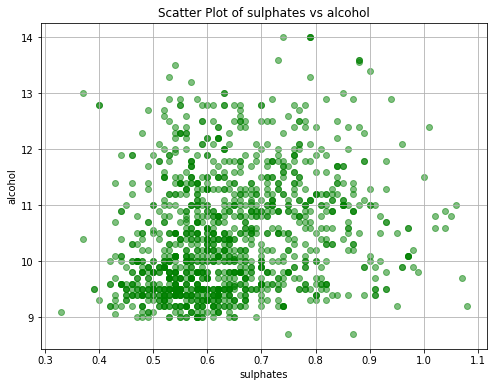

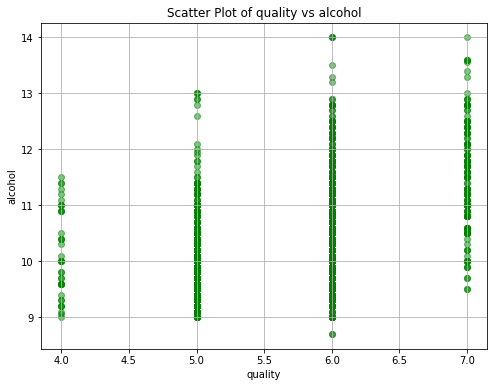

In [70]:
variables = data_filtered.columns[data_filtered.columns != 'alcohol']

for variable in variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(data_filtered[variable], data_filtered['alcohol'], alpha=0.5, color = 'green')
    plt.title(f'Scatter Plot of {variable} vs alcohol')
    plt.xlabel(variable)
    plt.ylabel('alcohol')
    plt.grid(True)
    plt.show()


In [71]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

X = data[['density']].values

degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)

X_poly = poly.fit_transform(X)

poly_feature_names = [f'density_{i}' for i in range(1, X_poly.shape[1] + 1)]

poly_features = pd.DataFrame(X_poly, columns=poly_feature_names)

data_poly = pd.concat([data, poly_features], axis=1)

print(data_poly.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  density_1  density_2  
0      9.4        5     0.9978   0.995605 

In [72]:
data_poly = data_poly.drop('density_1', axis = 1)
data_poly

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,density_2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.995605
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.993610
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.994009
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.996004
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.995605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.989826
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.990264
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.991498
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.990961


In [73]:
scaler = StandardScaler()
data = df
data_scaled = scaler.fit_transform(data.drop('alcohol', axis = 1))

n_components = 8
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

principal_components = ['PC'+str(i) for i in range(1, n_components+1)]
data_transformed = pd.DataFrame(data=data_pca, columns=principal_components)

final_data = pd.concat([data_transformed, data['alcohol']], axis=1)
data = final_data

In [74]:
# Extracting features and target variable
X = final_data.drop(columns=['alcohol'])
y = final_data['alcohol']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

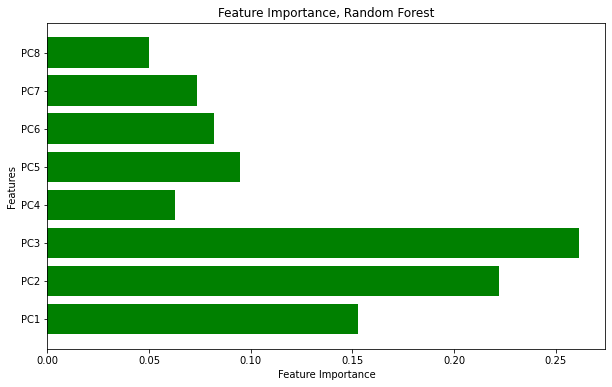

In [75]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(range(len(feature_importances)), feature_importances, align='center', color = 'green')
plt.yticks(range(len(feature_importances)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance, Random Forest')
plt.show()

# Model usage and hyperparameters tuning

In [76]:
# Initializing Linear Regression model
linear_regression = LinearRegression()

# Training the model
linear_regression.fit(X_train, y_train)

# Predictions
y_pred_lr = linear_regression.predict(X_test)

# Evaluating the model
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R^2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
Mean Squared Error: 0.7379636013416495
R^2 Score: 0.4072239300227478


In [77]:
#Decision Tree

decision_tree = DecisionTreeRegressor()

decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

print("\nDecision Tree:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R^2 Score:", r2_score(y_test, y_pred_dt))



Decision Tree:
Mean Squared Error: 0.7342369791666669
R^2 Score: 0.4102173736602932


In [78]:
#Random Forest

random_forest = RandomForestRegressor()

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

print("\nRandom Forest:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))



Random Forest:
Mean Squared Error: 0.4422458025454287
R^2 Score: 0.6447619796962747


In [79]:
#Ridge Regression

ridge_regression = Ridge()

ridge_regression.fit(X_train, y_train)

y_pred_ridge = ridge_regression.predict(X_test)

print("\nRidge Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R^2 Score:", r2_score(y_test, y_pred_ridge))



Ridge Regression:
Mean Squared Error: 0.7380049943535825
R^2 Score: 0.40719068070409103


In [80]:
#Support Vector Regression

svr = SVR()

svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

print("\nSupport Vector Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("R^2 Score:", r2_score(y_test, y_pred_svr))



Support Vector Regression:
Mean Squared Error: 0.43395265075013195
R^2 Score: 0.6514235303743886


In [81]:
#Gradient Boosting Regression

gradient_boosting = GradientBoostingRegressor()

gradient_boosting.fit(X_train, y_train)

y_pred_gb = gradient_boosting.predict(X_test)

print("\nGradient Boosting Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("R^2 Score:", r2_score(y_test, y_pred_gb))



Gradient Boosting Regression:
Mean Squared Error: 0.5032109492056994
R^2 Score: 0.5957911632804509


In [82]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "KNeighbors Regression": KNeighborsRegressor(),
    "Support Vector Regression": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"Mean Squared Error": mse, "R^2 Score": r2}

# Print results
for name, metrics in results.items():
    print(name + ":")
    print("Mean Squared Error:", metrics["Mean Squared Error"])
    print("R^2 Score:", metrics["R^2 Score"])
    print()

Linear Regression:
Mean Squared Error: 0.7379636013416495
R^2 Score: 0.4072239300227478

Ridge Regression:
Mean Squared Error: 0.7380049943535825
R^2 Score: 0.40719068070409103

Decision Tree Regression:
Mean Squared Error: 0.7133697916666668
R^2 Score: 0.4269791345049204

Random Forest Regression:
Mean Squared Error: 0.4362525584721742
R^2 Score: 0.6495761082816134

Gradient Boosting Regression:
Mean Squared Error: 0.5026646597974933
R^2 Score: 0.5962299752867313

KNeighbors Regression:
Mean Squared Error: 0.548785625
R^2 Score: 0.5591828845540783

Support Vector Regression:
Mean Squared Error: 0.43395265075013195
R^2 Score: 0.6514235303743886



In [83]:
# Defining the parameter grid for Random Forest Regression
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing Random Forest Regression model
random_forest = RandomForestRegressor()

# Initializing GridSearchCV for Random Forest Regression
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fitting GridSearchCV to the data
grid_search_rf.fit(X_train, y_train)

# Printing the best parameters found
print("Best Parameters for Random Forest Regression:", grid_search_rf.best_params_)

Best Parameters for Random Forest Regression: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [84]:
# Gradient Boosting Regression
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gradient_boosting = GradientBoostingRegressor()

grid_search_gb = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')

grid_search_gb.fit(X_train, y_train)

print("Best Parameters for Gradient Boosting Regression:", grid_search_gb.best_params_)

Best Parameters for Gradient Boosting Regression: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}


In [85]:
# KNeighbors Regression
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

kneighbors_regression = KNeighborsRegressor()

grid_search_knn = GridSearchCV(estimator=kneighbors_regression, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error')

grid_search_knn.fit(X_train, y_train)

print("Best Parameters for KNeighbors Regression:", grid_search_knn.best_params_)

Best Parameters for KNeighbors Regression: {'algorithm': 'brute', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [86]:
#Support Vector Regression
param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svr = SVR()

grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_svr.fit(X_train, y_train)

print("Best Parameters for SVR:", grid_search_svr.best_params_)

Best Parameters for SVR: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [87]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_  

print("Best Parameters for Decision Tree Regressor:", best_params)

Best Parameters for Decision Tree Regressor: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [94]:
# Random Forest Regression model with specified parameters

random_forest = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
# Training the model
random_forest.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluating the model
print("\nRandom Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regression:
Mean Squared Error: 0.44578867962635044
R^2 Score: 0.6419161310004541


In [96]:
# Support Vector Regression model with specified parameters
svr = SVR(C=1, kernel='rbf', gamma='scale')

svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

print("\nSupport Vector Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("R^2 Score:", r2_score(y_test, y_pred_svr))


Support Vector Regression:
Mean Squared Error: 0.43395265075013195
R^2 Score: 0.6514235303743886


In [90]:
# KNeighbors Regression model with specified parameters
kneighbors_regression = KNeighborsRegressor(algorithm='brute', n_neighbors=7, p=2, weights='distance')

kneighbors_regression.fit(X_train, y_train)

y_pred_knn = kneighbors_regression.predict(X_test)

print("\nKNeighbors Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R^2 Score:", r2_score(y_test, y_pred_knn))


KNeighbors Regression:
Mean Squared Error: 0.47243513482522614
R^2 Score: 0.620512120066991


In [95]:
# Gradient Boosting Regression model with specified parameters
gradient_boosting = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=150)

gradient_boosting.fit(X_train, y_train)

y_pred_gb = gradient_boosting.predict(X_test)

print("\nGradient Boosting Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("R^2 Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting Regression:
Mean Squared Error: 0.4360994397950435
R^2 Score: 0.6496991022714316


In [97]:
#Decision Tree model with specified parameters

decision_tree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 2, min_samples_split = 5)

decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

print("\nDecision Tree:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R^2 Score:", r2_score(y_test, y_pred_dt))



Decision Tree:
Mean Squared Error: 0.6649610622129285
R^2 Score: 0.465863892975405


# Final results of models performance

In [98]:
# Models with specified parameters

models = {
    "Decision Tree Regression": DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 2, min_samples_split = 5),
    "Random Forest Regression": RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50),
    "Gradient Boosting Regression": GradientBoostingRegressor(learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=150),
    "KNeighbors Regression": KNeighborsRegressor(algorithm='brute', n_neighbors=7, p=2, weights='distance'),
    "SVR" : SVR(C=1, kernel='rbf', gamma='scale')
}

# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"Mean Squared Error": mse, "R^2 Score": r2}

# Printing results
for name, metrics in results.items():
    print(name + ":")
    print("Mean Squared Error:", metrics["Mean Squared Error"])
    print("R^2 Score:", metrics["R^2 Score"])
    print()

Decision Tree Regression:
Mean Squared Error: 0.6569263399907059
R^2 Score: 0.47231785771511436

Random Forest Regression:
Mean Squared Error: 0.454114994851909
R^2 Score: 0.6352279414910729

Gradient Boosting Regression:
Mean Squared Error: 0.4357036694937128
R^2 Score: 0.6500170084166805

KNeighbors Regression:
Mean Squared Error: 0.47243513482522614
R^2 Score: 0.620512120066991

SVR:
Mean Squared Error: 0.43395265075013195
R^2 Score: 0.6514235303743886



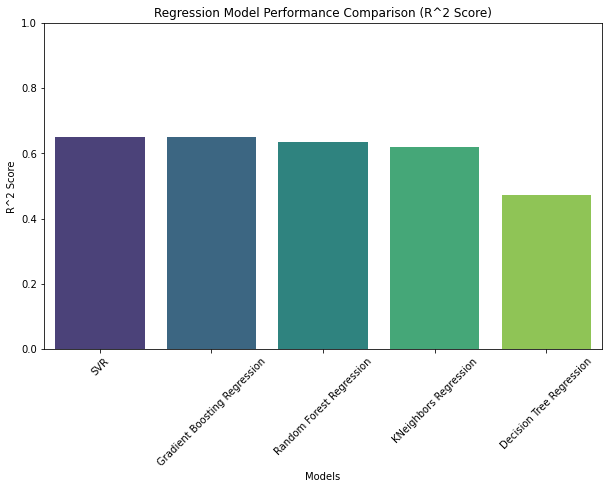

In [99]:
models = ['Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 
          'KNeighbors Regression', 'SVR']
r2_scores = [0.47231785771511436, 0.6352279414910729, 0.6500170084166805, 0.620512120066991, 0.6514235303743886]

# Sorting models based on their R^2 scores (from best to worst)
sorted_models = [model for _, model in sorted(zip(r2_scores, models), reverse=True)]
sorted_r2_scores = sorted(r2_scores, reverse=True)

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_models, y=sorted_r2_scores, palette='viridis')
plt.title('Regression Model Performance Comparison (R^2 Score)')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()